# Comparing calculated S6/ST to measured (Muth and Wallace, 2021)
- This notebook compares measured S6/ST values to those measured using XANES for Jugo, Nash and Oneill-Mavrogenes 2022

In [ ]:
#!pip install PySulfSat --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

## Load data (measured MI comps)

In [2]:
df_out=ss.import_data('Muth_data_Merged.xlsx', sheet_name='Sheet1')

df_out['Fe3Fet_Liq']=df_out['Fe3+/∑ Fe']

df_out_trim=df_out.iloc[:, 0:12]
df_out_trim['Sample_ID']=df_out['MI_Name']
df_out_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32
1,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,0.0,0.213707,BBL-5-33
2,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,0.0,0.181930,BBL-5-34
3,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.0,0.173842,BBL-5-43
4,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,0.0,0.142214,BBL-5-44


In [3]:
df_err=ss.import_data_noise('Muth_data_Merged.xlsx', sheet_name='Sheet1')
df_err_trim=df_err.iloc[:, 0:12]
df_err_trim['Sample_ID']=df_err['MI_Name']
df_err_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,Sample_ID
0,0.678665,0.096405,0.404524,0.303896,0.019579,0.520599,0.047518,0.264134,0.030958,0.023520,0.0,0.0,BBL-5-32
1,0.825791,0.026556,0.115552,0.420127,0.007783,0.152587,0.172061,0.212874,0.096533,0.030083,0.0,0.0,BBL-5-33
2,1.876183,0.018804,0.083276,0.194047,0.018462,0.149600,0.136053,0.187045,0.020508,0.010884,0.0,0.0,BBL-5-34
3,0.314276,0.036322,0.313526,0.424967,0.004634,0.043281,0.065173,0.272982,0.036137,0.017175,0.0,0.0,BBL-5-43
4,0.386098,0.036339,0.161871,0.387210,0.001353,0.057336,0.127017,0.097441,0.003957,0.005722,0.0,0.0,BBL-5-44


## Lets calculate a temperature 
- Using their H2O contents. 

In [4]:
import Thermobar as pt
Temp_3=pt.calculate_liq_only_temp(liq_comps=df_out, equationT='T_Put2008_eq22_BeattDMg', P=3, H2O_Liq=df_out['H2O'])
Temp_3.head()

0    1407.340081
1    1427.006146
2    1426.318219
3    1459.082125
4    1440.880509
dtype: float64

## Lets perform calcs straight up first

In [5]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

calc_GivenFe3.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.213088,-3.316331,14.165511,-19.356183,-1.306411,0.938474,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.282959,0.061714
1,0.856566,-3.054445,13.864131,-18.817435,1.787057,1.604158,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,0.0,0.213707,BBL-5-33,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.371922,0.060013
2,0.551477,-3.163752,13.828337,-18.836028,0.206641,1.249443,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,0.0,0.181930,BBL-5-34,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-7.735105,0.058840
3,0.555898,-2.805222,13.380534,-17.970140,0.224530,1.221990,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.0,0.173842,BBL-5-43,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.368103,0.061614
4,0.162507,-3.215526,13.566557,-18.446271,-1.639692,0.801218,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,0.0,0.142214,BBL-5-44,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.005795,0.053345


Text(0, 0.5, 'Calc S6/St')

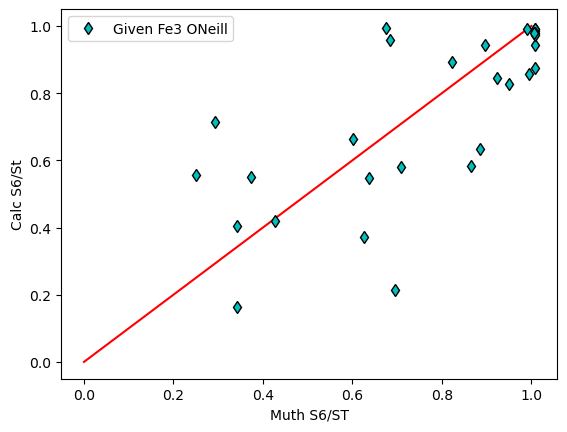

In [6]:
plt.plot([0, 1], [0, 1], '-r')

plt.plot(df_out['S6+/∑S'],
         calc_GivenFe3['S6St_Liq'],
         'dk', mfc='c', label='Given Fe3 ONeill')

plt.legend()
plt.xlabel('Muth S6/ST')
plt.ylabel('Calc S6/St')

In [7]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3['S6St_Liq'], xy=False)

{'R2': '0.52',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.02',
 'Mean': '-0.02',
 'Int': array([0.20075643]),
 'Grad': array([0.70812831])}

## Now lets account for error

In [82]:
N_dups=5000
# Lets set temp error at +-50 K
df_out_trim['T_K_Liq']=Temp_3
df_err_trim['T_K_Liq_Err']=50
# Take Fe3 error from other dataframe
df_err_trim['Fe3Fet_Liq_Err']=df_err['Fe3+/∑ Fe s.e.']

df_noisy_abs=ss.add_noise_2_dataframes(df_values=df_out_trim, df_noise=df_err_trim, 
        error_type="Abs", error_dist="normal", N_dups=N_dups)
df_noisy_abs.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,T_K_Liq,Sample_ID
0,50.275514,1.610342,17.094975,9.403697,0.175765,4.231846,9.709528,4.032189,0.622451,0.251227,0.0,0.162079,1409.445885,BBL-5-32
1,50.858871,1.346633,17.307667,8.797268,0.168178,5.236971,9.765655,3.804969,0.611394,0.257881,0.0,0.148564,1412.946827,BBL-5-32
2,49.424760,1.200055,16.717128,9.246849,0.160336,5.840024,9.854393,4.085572,0.642891,0.315834,0.0,0.213641,1362.800389,BBL-5-32
3,50.540613,1.240091,16.633849,9.127334,0.188118,6.142257,9.841942,3.489636,0.518491,0.288861,0.0,0.132233,1418.317148,BBL-5-32
4,50.019850,1.312258,16.519683,8.700197,0.205503,4.986479,9.793674,3.043010,0.646546,0.341725,0.0,0.143723,1378.219745,BBL-5-32


## Now put all this synthetic simulated data into the S6 calculation

In [83]:
noisy_ONeill_Fe_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,T_K_Liq,Sample_ID,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.207746,-3.289202,14.134182,-19.297770,-1.338565,0.930270,50.275514,1.610342,17.094975,9.403697,0.175765,4.231846,9.709528,4.032189,0.622451,0.251227,0.0,0.162079,1409.445885,BBL-5-32,0.554318,0.069557,0.001641,0.086708,0.114703,0.111070,0.043098,0.004378,0.013355,0.001172,0.477976,0.059977,0.001415,0.074766,0.098906,0.191547,0.074325,0.007549,0.011516,0.002022,0.445115,0.489103,-8.264563,0.062648
1,0.137858,-3.387583,14.034807,-19.201046,-1.833199,0.800035,50.858871,1.346633,17.307667,8.797268,0.168178,5.236971,9.765655,3.804969,0.611394,0.257881,0.0,0.148564,1412.946827,BBL-5-32,0.552641,0.084833,0.001548,0.079943,0.113697,0.110826,0.040082,0.004238,0.011007,0.001186,0.477926,0.073364,0.001339,0.069135,0.098326,0.191686,0.069325,0.007329,0.009519,0.002052,0.514830,0.554821,-8.350752,0.058864
2,0.781228,-3.690280,15.138563,-20.634317,1.272834,1.510368,49.424760,1.200055,16.717128,9.246849,0.160336,5.840024,9.854393,4.085572,0.642891,0.315834,0.0,0.213641,1362.800389,BBL-5-32,0.538299,0.094821,0.001479,0.084223,0.114996,0.107292,0.043137,0.004466,0.009831,0.001456,0.465515,0.082000,0.001279,0.072835,0.099447,0.185570,0.074609,0.007725,0.008502,0.002518,0.529588,0.588757,-8.292924,0.057274
3,0.061140,-3.249467,13.954409,-19.053611,-2.731508,0.617292,50.540613,1.240091,16.633849,9.127334,0.188118,6.142257,9.841942,3.489636,0.518491,0.288861,0.0,0.132233,1418.317148,BBL-5-32,0.545761,0.098878,0.001721,0.082426,0.113872,0.105848,0.036531,0.003571,0.010073,0.001320,0.475704,0.086185,0.001500,0.071845,0.099255,0.184521,0.063683,0.006226,0.008780,0.002302,0.545364,0.580247,-8.466353,0.062345
4,0.086677,-3.729354,14.326759,-20.182409,-2.354895,0.782851,50.019850,1.312258,16.519683,8.700197,0.205503,4.986479,9.793674,3.043010,0.646546,0.341725,0.0,0.143723,1378.219745,BBL-5-32,0.558096,0.082941,0.001942,0.081181,0.117081,0.108616,0.032914,0.004601,0.011013,0.001614,0.486254,0.072264,0.001692,0.070730,0.102009,0.189269,0.057355,0.008018,0.009596,0.002812,0.505355,0.544031,-8.814749,0.060565


## Now calculate the error bar for each row

In [84]:
import Thermobar as pt
Stats_Fe_S6=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID'])
Stats_Fe_S6.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:41: RuntimeWarning: Mean of empty slice
  Av_mean[i] = np.nanmean(calc[sampleID == sam])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:44: RuntimeWarning: All-NaN axis encountered
  Min[i] = np.nanmin(calc[sampleID == sam])
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:45: RuntimeWarning: All-NaN axis encountered
  Max[i] = np.nanmax(calc[sampleID == sam])


,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.249491,0.212864,0.174839,0.927895,0.002318
1,BBL-5-33,5000,0.819497,0.855039,0.131904,0.992533,0.121837
2,BBL-5-34,5000,0.532268,0.544649,0.208494,0.965102,0.004023
3,BBL-5-43,5000,0.532824,0.550921,0.215202,0.971717,0.018907
4,BBL-5-44,5000,0.206708,0.159820,0.168427,0.894909,0.000822


## Lets do the same using Nash
- If you just want to vary 1 thing, you can do it this way
- First, take your dataframe, and duplicate it N times, all the columns will be the same, but will now be Sample1-Sample1-Sample1, Sample2-Sample2-Sample2

In [85]:

Dupdf=ss.duplicate_dataframe(df=df_out_trim, N_dup=N_dups)
Dupdf.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,T_K_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,1407.340081
1,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,1407.340081
2,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,1407.340081
3,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,1407.340081
4,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.158692,BBL-5-32,1407.340081


### Now you can make the errors for one column at a time if you prefer

- E.g. adding a temp error of +- 1sigma = 50 K

In [86]:
Temp_Err=ss.add_noise_series(df_out_trim['T_K_Liq'], error_var=50,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this to the dataframe
Dupdf['T_K_MC']=Temp_Err

- And adding a Fe3Fet_Liq error of +-0.02

In [87]:
Fe3_Err=ss.add_noise_series(df_out_trim['Fe3Fet_Liq'], error_var=df_err_trim['Fe3Fet_Liq_Err'],
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
Dupdf['Fe3Fet_Liq_MC']=Fe3_Err

## Now put these uncertainties into Nash

In [88]:
noisy_Nash_S6St=ss.calculate_S6St_Nash2019(Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
                                          T_K=Dupdf['T_K_MC'])
noisy_Nash_S6St.head()

0    0.094496
1    0.035755
2    0.038187
3    0.062942
4    0.202432
dtype: float64

In [89]:
Stats_Nash_S6=pt.av_noise_samples_series(calc=noisy_Nash_S6St, sampleID=Dupdf['Sample_ID'])
Stats_Nash_S6.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:41: RuntimeWarning: Mean of empty slice
  Av_mean[i] = np.nanmean(calc[sampleID == sam])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:44: RuntimeWarning: All-NaN axis encountered
  Min[i] = np.nanmin(calc[sampleID == sam])
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:45: RuntimeWarning: All-NaN axis encountered
  Max[i] = np.nanmax(calc[sampleID == sam])


,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.198553,0.136163,0.187088,0.957623,0.000129
1,BBL-5-33,5000,0.747980,0.805308,0.198810,0.998350,0.046437
2,BBL-5-34,5000,0.460769,0.449893,0.248733,0.986037,0.007040
3,BBL-5-43,5000,0.477095,0.473311,0.251622,0.986895,0.002469
4,BBL-5-44,5000,0.148387,0.091561,0.158135,0.952287,0.000193


## And Jugo
- First, need to calculate QFM relative to frost from the Fe3Fet ratio

In [90]:
Buffer=pt.convert_fe_partition_to_fo2(liq_comps=Dupdf,  T_K=Dupdf['T_K_MC'].values, P_kbar=5,  
        model="Kress1991", Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
 renorm=False)
Buffer.head()

overwriting Fe3Fet_Liq to that specified in the function input


,DeltaQFM_Frost1991,DeltaNNO_Frost1991,fo2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,T_K_Liq,T_K_MC,Fe3Fet_Liq_MC,FeO_Liq,Fe2O3_Liq
0,0.126160,-0.385481,5.622050e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.167369,BBL-5-32,1407.340081,1355.311683,0.167369,7.685955,1.716634
1,-0.285603,-0.800072,6.163211e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.140280,BBL-5-32,1407.340081,1389.976237,0.140280,7.93601,1.438796
2,-0.108573,-0.619455,2.476367e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.153919,BBL-5-32,1407.340081,1346.291446,0.153919,7.810114,1.57868
3,-0.153223,-0.668378,1.076167e-09,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.147016,BBL-5-32,1407.340081,1398.664048,0.147016,7.873834,1.507879
4,0.040376,-0.478348,6.245536e-09,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,0.0,0.155120,BBL-5-32,1407.340081,1445.623720,0.155120,7.799026,1.591


In [91]:
noisy_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Buffer['DeltaQFM_Frost1991'])
noisy_Jugo.head()

0    0.014002
1    0.002127
2    0.004795
3    0.003907
4    0.009476
Name: DeltaQFM_Frost1991, dtype: float64

In [92]:
Stats_Jugo_S6=pt.av_noise_samples_series(calc=noisy_Jugo, sampleID=Dupdf['Sample_ID'])
Stats_Jugo_S6.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:41: RuntimeWarning: Mean of empty slice
  Av_mean[i] = np.nanmean(calc[sampleID == sam])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:44: RuntimeWarning: All-NaN axis encountered
  Min[i] = np.nanmin(calc[sampleID == sam])
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:45: RuntimeWarning: All-NaN axis encountered
  Max[i] = np.nanmax(calc[sampleID == sam])


,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.021947,0.009659,0.034085,0.351589,9.760684e-07
1,BBL-5-33,5000,0.381076,0.359984,0.217644,0.958752,4.248576e-03
2,BBL-5-34,5000,0.082499,0.050613,0.091942,0.756740,1.978024e-04
3,BBL-5-43,5000,0.090853,0.054270,0.101437,0.823665,9.544942e-05
4,BBL-5-44,5000,0.011043,0.004526,0.021243,0.435603,1.383316e-06


In [93]:
S_types=ss.convert_S_types(S_wt=df_out['S'])
S_types.head()

,S_wt,S_ppm,SO2_wt,SO2_ppm,SO3_wt,SO3_ppm,SO4_wt,SO4_ppm
0,0.133403,1334.034269,0.266528,2665.281066,0.333090,3330.904464,0.399653,3996.527863
1,0.150144,1501.439419,0.299974,2999.741572,0.374889,3748.892648,0.449804,4498.043724
2,0.124034,1240.340506,0.247809,2478.089313,0.309696,3096.963717,0.371584,3715.838121
3,0.108941,1089.410000,0.217654,2176.543672,0.272011,2720.110507,0.326368,3263.677343
4,0.093533,935.330000,0.186871,1868.705623,0.233539,2335.393434,0.280208,2802.081245


## Pic one sample

In [94]:
sam=df_out['MI_Name'].loc[df_out['S6+/∑S'].between(0.4, 0.45)].iloc[0]
sam

'BBL-5-46'

## Show input MC

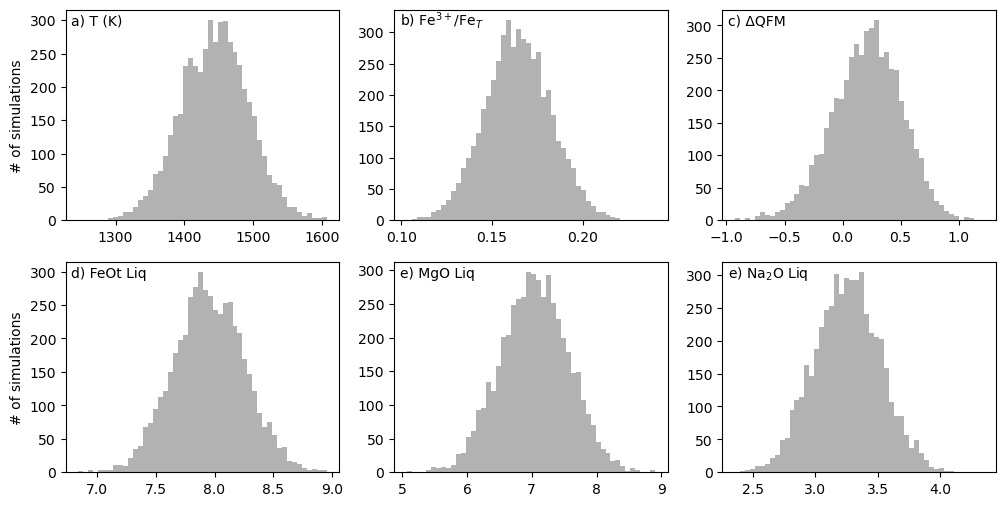

In [119]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6))
bins=50
ax1.hist(df_noisy_abs['T_K_Liq'].loc[Dupdf['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax2.hist(df_noisy_abs['Fe3Fet_Liq'].loc[Dupdf['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax4.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax5.hist(df_noisy_abs['MgO_Liq'].loc[df_noisy_abs['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax6.hist(df_noisy_abs['Na2O_Liq'].loc[df_noisy_abs['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax1.set_ylabel('# of simulations')
ax4.set_ylabel('# of simulations')
ax1.annotate("a) T (K)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax2.annotate("b) Fe$^{3+}$/Fe$_{T}$", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax3.annotate("c) ΔQFM", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax4.annotate("d) FeOt Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax5.annotate("e) MgO Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax6.annotate("e) Na$_2$O Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)

fig.savefig('MonteCarlo_Muth_input.png', dpi=200)

(array([  11.,   38.,  237.,  659., 1241., 1267.,  999.,  408.,  119.,
          21.]),
 array([6.84046672, 7.05220033, 7.26393394, 7.47566755, 7.68740117,
        7.89913478, 8.11086839, 8.32260201, 8.53433562, 8.74606923,
        8.95780284]),
 <BarContainer object of 10 artists>)

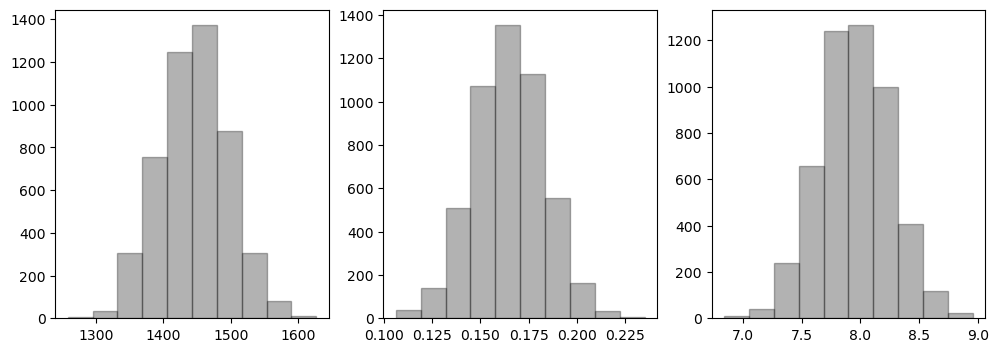

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.hist(Dupdf['T_K_MC'].loc[Dupdf['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
ax2.hist(Dupdf['Fe3Fet_Liq_MC'].loc[Dupdf['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
#ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
ax3.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)

## Figure for text showing S6/St with errorbars

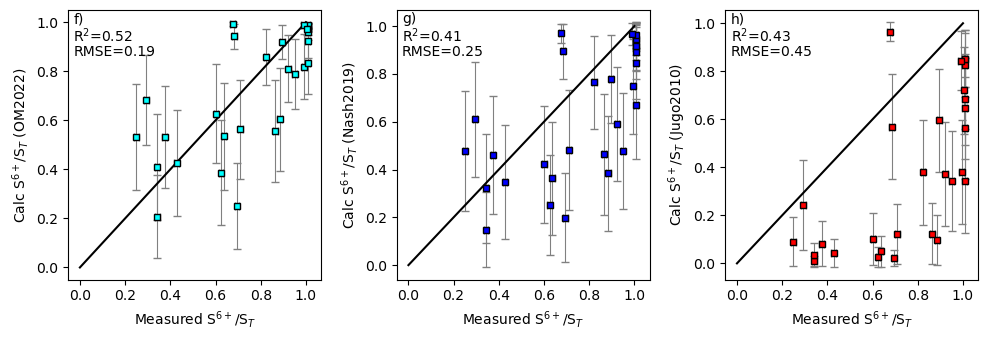

In [127]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6['Mean_calc'], xy=False)
ax1.annotate('f)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('g)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('h)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs.png', dpi=200)

In [21]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)

{'R2': '0.40',
 'RMSE': '0.49',
 'RMSE_num': 0.49,
 'P_val': '0.000',
 'Median': '-0.40',
 'Mean': '-0.43',
 'Int': array([-0.22587642]),
 'Grad': array([0.73313746])}

In [22]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)

{'R2': '0.41',
 'RMSE': '0.26',
 'RMSE_num': 0.26,
 'P_val': '0.000',
 'Median': '-0.11',
 'Mean': '-0.13',
 'Int': array([0.12872225]),
 'Grad': array([0.6558626])}

In [23]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6['Mean_calc'], xy=False)

{'R2': '0.52',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.03',
 'Int': array([0.20389634]),
 'Grad': array([0.68627525])}